In [294]:
# Import library(s)

# General library(s)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Library(s)
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Result Metric
from sklearn.metrics import confusion_matrix, classification_report



## Data Loading

In [295]:
# Load dataset to project

df = pd.read_csv("./dataset/iris.csv")

In [296]:
# Check dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [297]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [298]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [299]:
# Check if there is null or missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data lengkap. Tidak ada data yang kosong

In [300]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Data iris berisi tiga klasifikasi jenis bunga, setosa, versicolor, dan verginica. Setiap spesies bunga iris memiliki data panjang dan lebar sepal dan petal dari masing-masing spesies.

## Exploratory Data Analysis

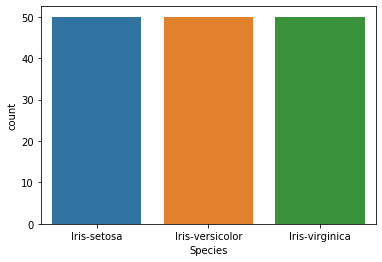

In [340]:
## Look data by it species

sns.countplot(x='Species', data=df)

# save image
plt.savefig('./export/countplot.png', bbox_inches='tight')

plt.show()

Masing-masing spesies memiliki jumlah data sampel yang sama sehingga dapat dikatakan perbandingannya seimbang

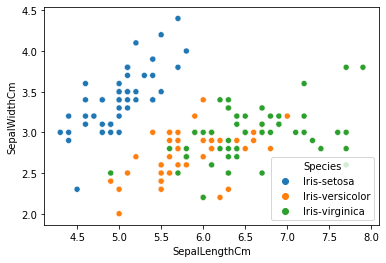

In [341]:
## Visualize data based on it species in every feature

sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

# save image
plt.savefig('./export/sepal.png', bbox_inches='tight')

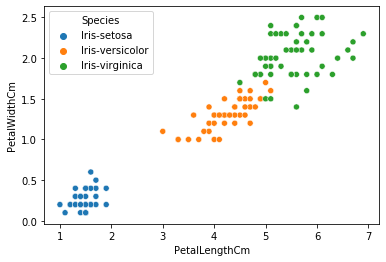

In [342]:
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

# save image
plt.savefig('./export/petal.png', bbox_inches='tight')

Spesies Setosa dapat dibedakan dari dua spesies yang lain menggunakan scatter plot karena posisinya yang berjauhan dari dua spesies yang lain. Di sisi lain, spesies versicolor dengan virginica lokasi datanya tumpang tindah. Namun lebih dapat dibedakan jika menggunakan ukuran petal dari masing-masing spesies.

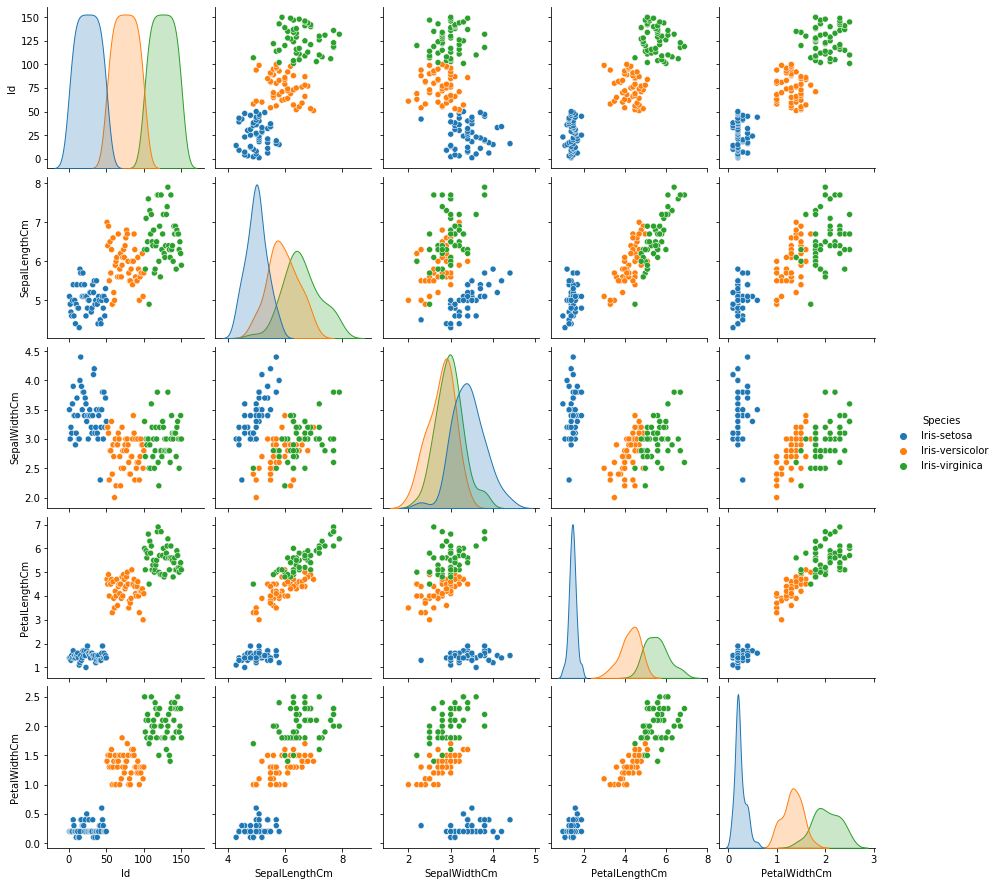

In [343]:
sns.pairplot(data=df, hue="Species")

# save image
plt.savefig('./export/pairplot.png', bbox_inches='tight')

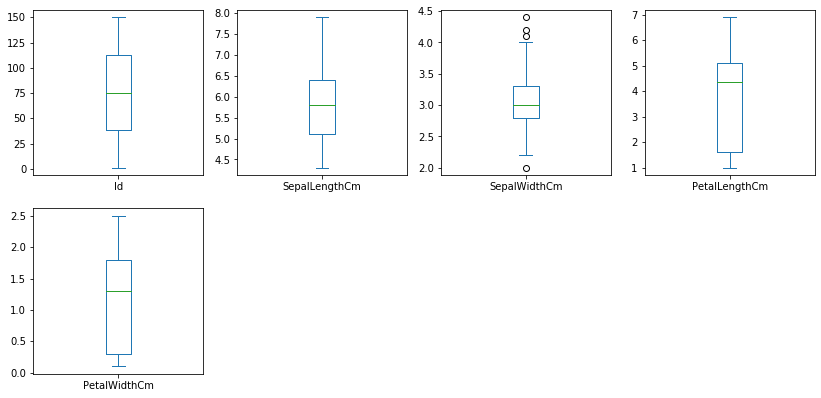

In [306]:
# Boxplot to see outlier

df.plot(kind='box', subplots = True, layout = (4,4), figsize = (14,14))
plt.show()

Seluruh feature bersih dari outlier kecuali untuk feature sepalWidth

## Data Preprocessing

In [307]:
# Copy feature

category = df[["SepalLengthCm",
                           "SepalWidthCm",
                           "PetalLengthCm", 
                           "PetalWidthCm"]]

df_ann = category.copy()

df_ann

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [308]:
# One-hot encoding for 'Species' categorical data

encoding = pd.get_dummies(df.Species, prefix='species')

## Concat data
df_ann = pd.concat([df_ann, encoding], axis=1)


# Rename
df_ann.rename(columns = {'species_Iris-setosa':'setosa',
                         'species_Iris-versicolor':'versicolor',
                         'species_Iris-virginica':'virginica'}, 
              inplace = True)

df_ann


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


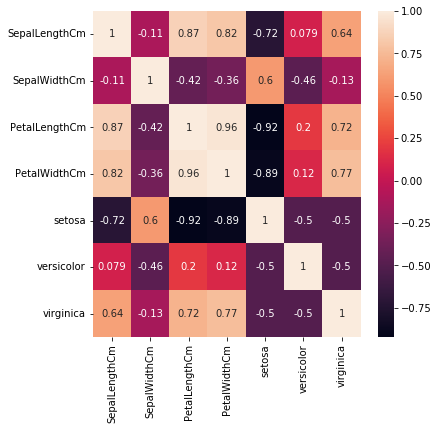

In [344]:
fig = plt.subplots(figsize=(6,6))
sns.heatmap(df_ann.corr(), annot=True)

# save image
plt.savefig('./export/heatmap.png', bbox_inches='tight')

## Data Modelling

In [326]:
from sklearn.multioutput import MultiOutputClassifier

# Create train and test data


# Determine feature (x) and target (y)
data_vars = df_ann.columns.values.tolist()
y = ['setosa', 'versicolor', 'virginica']
x = [i for i in data_vars if i not in y]


# Use 70% data for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(df_ann[x], 
                                                    df_ann[y], 
                                                    test_size=0.3, 
                                                    random_state=0)

In [327]:
# Normalize train data

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

print("Data training", x_train.shape); print("Data testing ", x_test.shape)

Data training (105, 4)
Data testing  (45, 4)


In [328]:
# Sci-kit learn ANN

# Use 3 hidden layer with 10 unit for each hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(10,10, 10), 
                    activation='relu', 
                    solver='sgd', 
                    max_iter=1000)

mlp.fit(x_train,y_train)
print("Training score : ", mlp.score(x_train, y_train))

y_predict_train = mlp.predict(x_train)
y_predict_test = mlp.predict(x_test)

Training score :  0.9809523809523809


/home/fandiadinata/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [329]:
# Print Result


print('ARTIFICIAL NEURAL NETWORK TRAINING RESULT:')
print('======================================================')
print('Accuracy:', mlp.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_predict_train))
print('======================================================')
print('Confussion Matrix Setosa -----------------------------')
print(confusion_matrix(y_train.setosa, y_predict_train[:,0]))
print('Confussion Matrix Versicolor -------------------------')
print(confusion_matrix(y_train.versicolor, y_predict_train[:,1]))
print('Confussion Matrix Virginica --------------------------')
print(confusion_matrix(y_train.virginica, y_predict_train[:,2]))


print('\n======================================================')

print('ARTIFICIAL NEURAL NETWORK TESTING RESULT:')
print('======================================================')
print('Accuracy:', mlp.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_predict_test))
print('======================================================')
print('Confussion Matrix Setosa -----------------------------')
print(confusion_matrix(y_test.setosa, y_predict_test[:,0]))
print('Confussion Matrix Versicolor -------------------------')
print(confusion_matrix(y_test.versicolor, y_predict_test[:,1]))
print('Confussion Matrix Virginica --------------------------')
print(confusion_matrix(y_test.virginica, y_predict_test[:,2]))

print('\n======================================================')


# Test to all data in dataset
x_test_df, x_train_df, y_test_df, y_train_df = train_test_split(df_ann[x], df_ann[y], test_size=1, random_state=99)
x_test_df = StandardScaler().fit_transform(x_test_df)
y_predict_df = mlp.predict(x_test_df)

print('ARTIFICIAL NEURAL NETWORK TESTING TO DATASET RESULT:')
print('======================================================')
print('Accuracy:', mlp.score(x_test_df, y_test_df))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test_df, y_predict_df))
print('======================================================')
print('Confussion Matrix Setosa -----------------------------')
print(confusion_matrix(y_test_df.setosa, y_predict_df[:,0]))
print('Confussion Matrix Versicolor -------------------------')
print(confusion_matrix(y_test_df.versicolor, y_predict_df[:,1]))
print('Confussion Matrix Virginica --------------------------')
print(confusion_matrix(y_test_df.virginica, y_predict_df[:,2]))

print('\n======================================================')

ARTIFICIAL NEURAL NETWORK TRAINING RESULT:
Accuracy: 0.9809523809523809
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.94      0.97        32
           2       0.95      1.00      0.97        39

   micro avg       0.98      0.98      0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105
 samples avg       0.98      0.98      0.98       105

Confussion Matrix Setosa -----------------------------
[[71  0]
 [ 0 34]]
Confussion Matrix Versicolor -------------------------
[[73  0]
 [ 2 30]]
Confussion Matrix Virginica --------------------------
[[64  2]
 [ 0 39]]

ARTIFICIAL NEURAL NETWORK TESTING RESULT:
Accuracy: 0.9111111111111111
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00 